In [63]:
import os
import tarfile
from  six.moves import urllib

In [64]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

In [65]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    '''
    This function takes two argumnets, 
        housing_url- from where you want to fetch the data
        housing_path- where you want to save your fetched data
    '''
    if not os.path.isdir(housing_path): 
        # means if there is no such directory mentioned, create one
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # this peice of code will retrieve the tarfile and save it as housing.tgz
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [66]:
# Function calling that will fetch the data and extract it
fetch_housing_data()

In [67]:
import pandas as pd
def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

In [68]:
# Let's have the data
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
# To get an insight about the dataset we can use .info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [70]:
# further getting more insight, we wanted to know a little bit more about the ocean_proximity, as it is a categorical
# we want to know how many categories it has and what are those called
housing['ocean_proximity'].value_counts()
# there are five categories with the number of times of their reference

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [71]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(*args, **kw)>

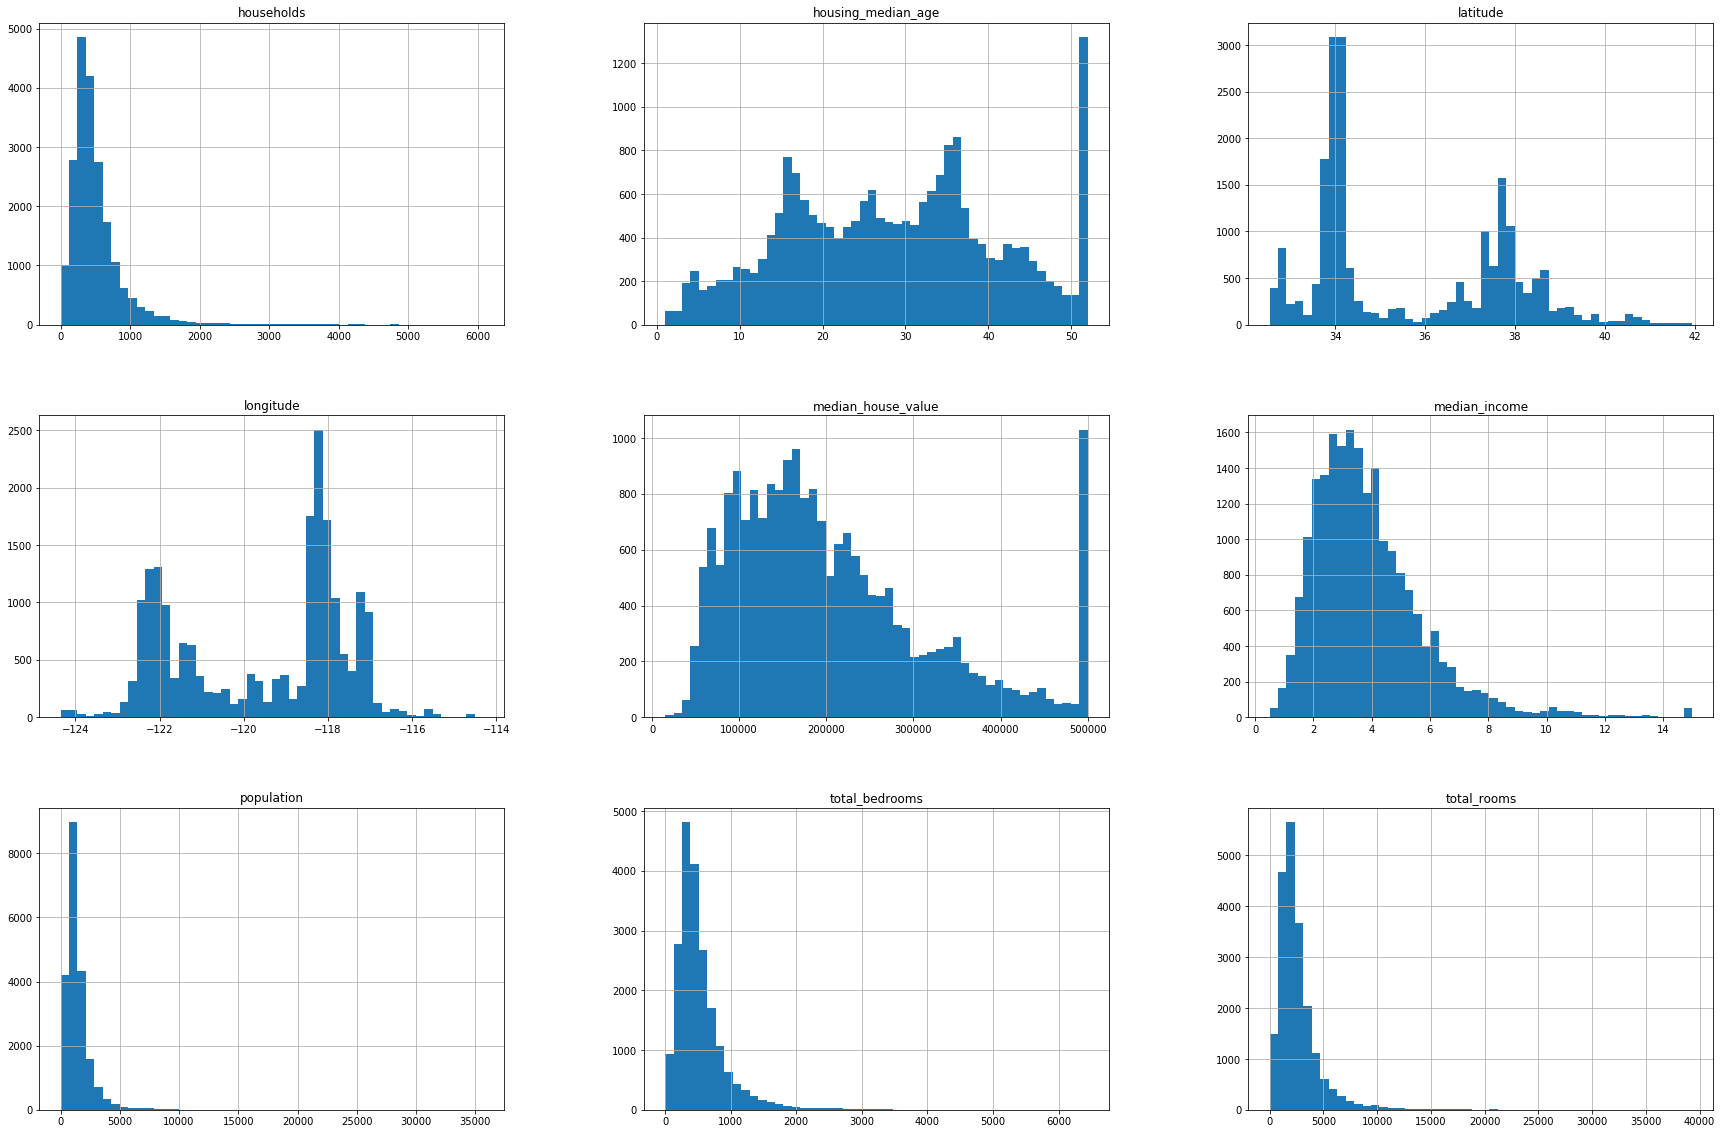

In [72]:
# How about plotting the instances over these parameters
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(30, 20))
plt.show

In [73]:
# Creating a test set which will divide our training set into 20% - 80%
import numpy as np
def split_train_test(data, test_ratio):
    '''
    This function takes the input data and the ratio in which we need to divide the data into test set
    output - train_set and test_set
    '''
    # though we have a function that can help us create the set, we will create our own function for that
    #np.random.permutation(number) it will give an array having value from 0 to n - 1 randomly shuffled
    shuffled_indices = np.random.permutation(len(data)) #an array of 20640 numbers randomly shuffled
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size] # i.e 0 to test_set_size, we'll be having test_set
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [74]:
# let's check the above function out
train_set, test_set = split_train_test(housing, 0.2)
print(' total training set: {}\n total test set: {}'.format(len(train_set), len(test_set)))

 total training set: 16512
 total test set: 4128


## Check for Test Set having ID

<p> The thing is although we are fetching the updated data, but it will not be ocnsistent, because whole new test set will be constructed in this case and we don't weant it</p>What we can do is use a column that will contain the unique ID of each instances and only append 20% of the new instances in the test set.

In [75]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [76]:
def split_train_test_by_ID(data, test_ratio, id_column, hash=hashlib.md5):
    '''
    The function takes 3 arguments here:
    housing_with_ID- This is a modified dataset, having an extra column called "index"
    test_train_ratio- 0.2
    name of the identifier column- "index"'''
    ids = housing_with_ID[id_column]
    in_test_set = ids.apply(lambda id_:train_set_check(id_, test_ratio, hash))
    return data.iloc[~in_test_set], data.iloc[in_test_set]

In [77]:
# Another Method to achieve the same thing
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0)

<p>Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset.</p>
<p>Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely</p>
Most median income values are clustered around 2–5 (tens of thousands of dollars), but some median incomes go far beyond 6.

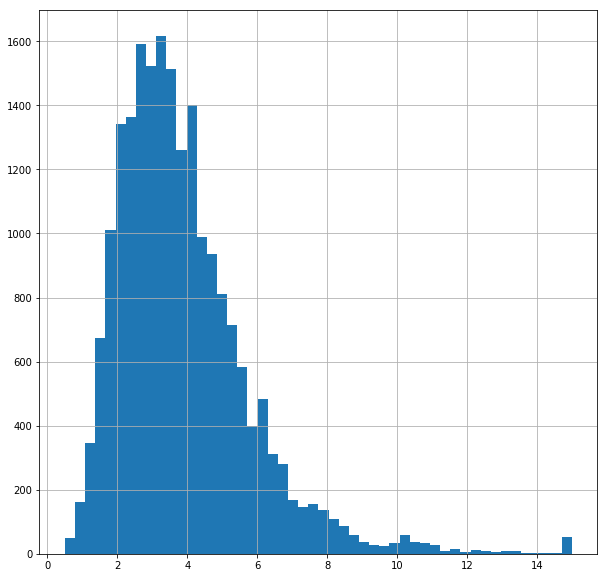

In [78]:
%matplotlib inline
housing['median_income'].hist(bins=50, figsize=(10, 10))
plt.show()


<p style="font-size:110%">Now as we can see we have very less data for the median income greater than 5, so what we want to do is put them in the same category. I don't know why? and the rest in one category. so what we will now have is the discrete integer categories. i.e in 3 we'll be having all the instances less than 3 and greater than 2</p>

In [79]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

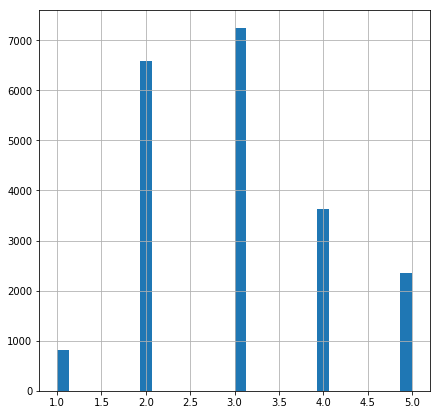

In [80]:
#Let's visualise the dataset
housing['income_cat'].hist(bins=30, figsize=(7,7))

In [81]:
# if the median_income is greater than 5 it is actually accounted in 5 only
# i think now we need to again split our data because a new feature has been added,
# so it has to be present in both, but remember that random_state should be same
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [82]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [83]:
# After having an insight on the data we should now delete income_cat and get back the original data
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)

In [84]:
housing = strat_train_set.copy() 
# creating a copy of the training set to discover new things and not affect the original data

## Visualising the Data

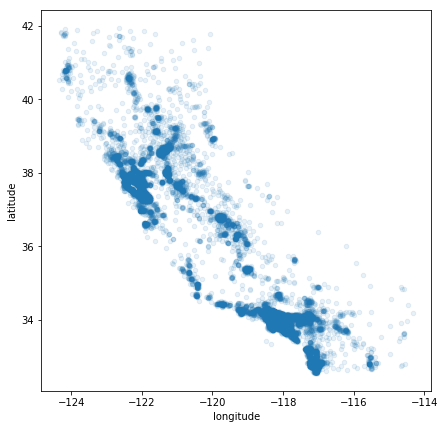

In [85]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1, figsize=(7, 7))
# Setting alpha = 0.1 helps us visualise the density

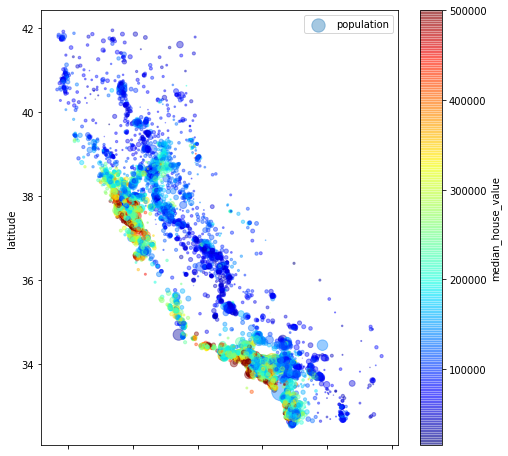

In [86]:
# Let's plot the scatter plot having both the information -the locality and -the population
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing["population"] / 100,
            label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(8, 8))
plt.legend()

## Looking for Correlations
correlation matrix actually helps us to find which attribute has correlation with other attribute, here we want to find the correlation between the median_house_value and other attributes(features)

In [87]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# we can clearly see that the median_income is more correlated with the median_house_value

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d88c50>,
      dtype=object)

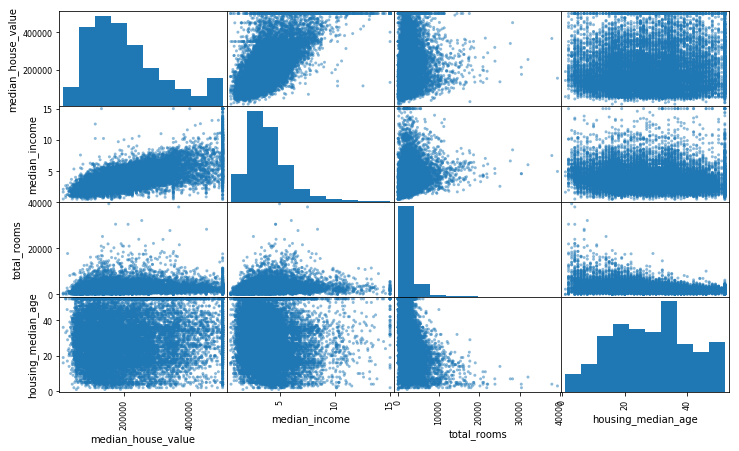

In [88]:
# there is a panda toolbok which plots every features with every other features
from pandas.tools.plotting import scatter_matrix
# as we don't want to plot all the features vs all the features, we will specify only some of them
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 7))

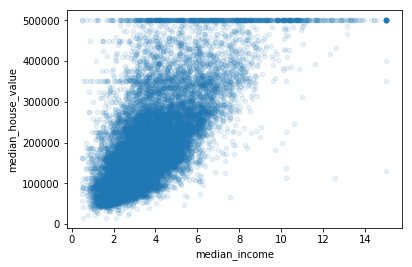

In [89]:
# what we can see is that there is correlation between the median_house_value and median_income, so let's plot it
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
# the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000

## Experimenting with Attribute Combination
<p> there are some attributes which by themselve are not giving anny insightful informationn, but when combined with certainn other features cann be very poweful in determining the truth, so we'll create some new features by combining the present features

In [90]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [91]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [92]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning
<p> We cann get rid of the data using dropna(), drop() or fillna()</p>or we can use Imputer class of scikit learn

In [93]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
# as it will calculate the median of each annd every attribute, so all the attribute
# need to be numerical so we need to drop oceann proximity
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
# all the median will be calculated for each feature and stored in statistics_ 

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [94]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [95]:
X = imputer.transform(housing_num) # this statement will create a new feature vector that will fill the na value with the median

In [96]:
# lets visualise it again
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


## Handling Text and Categorical attributes
<p> we can change the oceann_proximity to something numerical using sklearns LabelEncoders, it basically maps from 0 to n-1 where n is the total different categories

In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoder = encoder.fit_transform(housing_cat)
housing_cat_encoder

array([0, 0, 4, ..., 1, 0, 3])

In [98]:
print(encoder.classes_)
# np.shape(housing_cat_encoder.reshape(-1, 1)) it will give (16512, 1) and the other will give (16512, )

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [99]:
# but due to the 0, 1, 2, 3... the ML algorithm assumes that they are relative but they are not so we need OneHotEncoder
# which means for one class only that feature will be 1 and all other will be 0
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# OneHotEncoder() expects the 2D array but we have our array as 1D array so we need to reshape it
housing_cat_1hot = encoder.fit_transform(housing_cat_encoder.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [100]:
# to convert the sparse array into normal numpy array
# note here we don't have to perform it into two steps,
# > LabelEncoder
# > OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [101]:
# Visualising the dataset
housing_without_cat = housing.iloc[:,:-1]
final_housing_with_encoders = np.c_[housing_tr, housing_cat_1hot]
visualising_data = pd.DataFrame(final_housing_with_encoders)
visualising_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.0,0.0,0.0,0.0,0.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1.0,0.0,0.0,0.0,0.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,0.0,0.0,0.0,0.0,1.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,0.0,1.0,0.0,0.0,0.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.0,0.0,0.0,0.0,0.0


## Transformation Pipelines
<p style="font-size:110%">DataFrameSelector(), Imputer(), CombinedAttributesAdder(), StandardScaler(), LabelBinarizer(), FeatureUnion</p>

In [102]:
# a class to help up with LabelBinarizer
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)
    
#     In this class we are actually passing all the values to the upper class i.e LabelBinarizer itself,
# we are not doing anything new here

In [103]:
# class for DataFrame selector
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    # inhereting the two classes
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [104]:
# This will add additional features like no_of_bedrooms / total_rooms
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do def transform(self, X, y=None):
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [105]:
from sklearn.pipeline import FeatureUnion 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
             ('selector', DataFrameSelector(num_attribs)),
             ('imputer', Imputer(strategy="median")),
             ('attribs_adder', CombinedAttributesAdder()),
             ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
             ('selector', DataFrameSelector(cat_attribs)),
             ('label_binarizer', LabelBinarizerPipelineFriendly()),
#     LabelBinarizer don't work in Pipeline
])
full_pipeline = FeatureUnion(transformer_list=[
             ("num_pipeline", num_pipeline),
             ("cat_pipeline", cat_pipeline),
])

In [106]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared = pd.DataFrame(housing_prepared)
housing_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0


In [107]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# error before using housing_prepared 69050.9817

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
from sklearn.metrics import mean_squared_error
housing_error = mean_squared_error(lin_reg.predict(housing_prepared), housing_labels)
lin_rmse = np.sqrt(housing_error)
lin_rmse

68628.19819848922

In [109]:
# let's train our data to another algorithm, DescisionTree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
# let'scheck out for the error

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [110]:
tree_mse = mean_squared_error(tree_reg.predict(housing_prepared), housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [113]:
# Has it badly overfitted, how to check, we can't touch the test dataset, so let's create a cross validation dataset
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
# we have used neg_mean_squared_error, the metric used here is greater is better utility funnctionn rather than cost function

In [115]:
def display_scores(score):
    print("Scores: ", score)
    print("Mean:", score.mean())
    print("Standard Deviation:", score.std())
display_scores(rmse_scores)

Scores:  [68625.98314772 68058.22403561 70040.58517352 68646.31770797
 71859.15045829 76367.5159451  71331.78657214 71273.442893
 77673.80983488 70564.14582403]
Mean: 71444.09615922543
Standard Deviation: 3053.5391244444745


In [116]:
# let's try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
score_forest = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-score_forest)
display_scores(forest_rmse_scores)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Scores:  [51757.59913432 49186.59396743 51995.18107011 54664.14522795
 52055.53254912 55826.91164449 51343.06145585 50901.1777516
 54595.63263743 52898.40319893]
Mean: 52522.423863722
Standard Deviation: 1901.9513675986307


In [117]:
# We should save all the models before finaling one model, say in case we change our mood and we want to compare
# between these models againn, so it will be difficult for us
from sklearn.externals import joblib
# joblib.dump(my_model,'my_model.pkl')
# # and later
# my_model_loaded = joblib.load('my_model.pkl')

In [120]:
# Now after finalising your model, you may want to fine tune it to get even better result by tweakinng some hyperparameters
# but doing that will take a lot of time, what if we automate this process,
# it is called Grid Search, where All you need to do is tell it which
# hyperparameters you want it to experiment with, and what values to 
# try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [121]:
# let's check out which best_param
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [123]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Analyze the Best Models and Their Errors

In [124]:
# We will try to find out the features that really impacted the output
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.37275239e-02, 6.48499893e-02, 4.34633447e-02, 1.65723167e-02,
       1.62379794e-02, 1.75467480e-02, 1.60166320e-02, 3.40002581e-01,
       4.99942454e-02, 1.09838210e-01, 8.48361244e-02, 1.15884764e-02,
       1.47336187e-01, 9.45736622e-05, 3.86888939e-03, 4.02617918e-03])

In [129]:
# now lets add the labels so we can know what are the corresponding features
extra_attribs = ["rooms_per_hold", "pop_per_hold", "bedrooms_per_rooms"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34000258080606277, 'median_income'),
 (0.14733618690930939, 'INLAND'),
 (0.10983820972105568, 'pop_per_hold'),
 (0.08483612441413922, 'bedrooms_per_rooms'),
 (0.07372752386852426, 'longitude'),
 (0.06484998926266297, 'latitude'),
 (0.0499942454463776, 'rooms_per_hold'),
 (0.04346334472099475, 'housing_median_age'),
 (0.017546748044082114, 'population'),
 (0.01657231673244714, 'total_rooms'),
 (0.016237979431627563, 'total_bedrooms'),
 (0.016016631974298635, 'households'),
 (0.011588476432155104, '<1H OCEAN'),
 (0.004026179179894912, 'NEAR OCEAN'),
 (0.0038688893942070072, 'NEAR BAY'),
 (9.457366216102065e-05, 'ISLAND')]

## Evaluate Your System on the Test Set

In [130]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [131]:
final_rmse

48168.64916470395